<a href="https://colab.research.google.com/github/omartinez182/VMLS/blob/main/Python_Companion/VMLS_Python%2C_Ch_01_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#NumPy, Matplotlib, and other packages are throughout these notebooks
# to fulfill Julia built-in features (array casting, sparse vectors) 
#and VMLS companion package imports (e.g. Plot)
import numpy as np

# 1.1 Vectors
Vectors are represented as one-dimensional Array objects, and assigned with '='

In [ ]:
x = np.array([-1.1,0.0,3.6,-7.2])
y = np.array([-1.1,0.0,3.6,-7.2])
x,y, len(x), len(y)

(array([-1.1,  0. ,  3.6, -7.2]), array([-1.1,  0. ,  3.6, -7.2]), 4, 4)

In [ ]:
a = np.array([1,2])
b = (1,2)
a,b #a is a vector, b is a tuple of scalars 

(array([1, 2]), (1, 2))

#### Indexing

In [ ]:
x[3], x[2] #Julia is 1-indexed, Python is 0-indexed

(-7.2, 4.0)

In [ ]:
x[2] = 4.0
x

array([-1.1,  0. ,  4. , -7.2])

#### Assignment versus Copying

In [ ]:
y = x
x[3] = 4.0
y

array([-1.1,  0. ,  4. ,  4. ])

In [ ]:
y[1] = 2.0
x #Same as in Julia, and different from MatLab/Octave: 
  #assigning an array to another doesn't make a new copy of the values
  #it just createss a new reference to the same values

array([-1.1,  2. ,  4. ,  4. ])

In [ ]:
x = np.array([-1.1,0.0,3.6,-7.2])
y = x.copy() #equivalent to copy(x) in Julia, 
             #resolves the new reference topic from above
x[2] = 4.0
y[0] = 2.0
x,y

(array([-1.1,  0. ,  4. , -7.2]), array([ 2. ,  0. ,  3.6, -7.2]))

In [ ]:
x = np.array([-1.1,0.0,3.6,-7.2])
y = x.copy()
y[2] = 4.0
# y==x #relational operators in Julia check the entire vector to determine a single boolean expression
       #relational operators in Python check each individual vector value
z=x.copy()
z[1] = 4.0
x[1] = 4.0
y == x, z == x

(array([ True, False, False,  True]), array([ True,  True,  True,  True]))

In [ ]:
x = np.array([1.3])
y = 1.3
x,y, x==y, x[0]==y, type(x)==type(y)
#Different from Julia: the third result would be false 
#because they're different types (array and int), just like the 5th result
#the fourth result is the same, barring 0,1 indexing differences

(array([1.3]), 1.3, array([ True]), True, False)

#### Block or Stacked Vectors

In [ ]:
#In Julia you concatenate vectors using semicolon or vcat: [x;y] or vcat(x,y)
#In Python you can use:
x = np.array([1,-2]); y = np.array([1,1,0]);
z = np.concatenate((x,y))
z

array([ 1, -2,  1,  1,  0])

#### Subvectors and Slicing

In [ ]:
x = np.array([9,4,3,0,5,1,3,4,0,3,5,6,8])
y = x[1:4] #slicing in python is [inclusive:exclusive], in julia: [inclusive:inclusive]
y

array([4, 3, 0])

In [ ]:
x[3:5] = [-2,-3] #would be x[4:5] in Julia
                 #as though Julia says: items i through j; Python says: from item i to item j
x

array([ 9,  4,  3, -2, -3,  1,  3,  4,  0,  3,  5,  6,  8])

In [ ]:
#In Julia a reverse slice is: [end:-1:1] ie [start:increment:end]
#In Python a reverse slice is: [::-1] ie [start:end:increment]
x,x[2:0:-1] #would be: x[3:-1:2]

(array([ 9,  4,  3, -2, -3,  1,  3,  4,  0,  3,  5,  6,  8]), array([3, 4]))

#### Vector of First Differences

In [ ]:
#Julia successively compiles an array when running:
#x = [1,0,0,-2,2]
#d = x[2:end] - x[1:end-1]; which gives the vector of differences 
#But in python you have to run a list comprehension:
x = np.array([1,0,0,-2,2])
x, np.array([x[i+1]-x[i] for i in range(len(x)-1)])

(array([ 1,  0,  0, -2,  2]), array([-1,  0, -2,  4]))

In [ ]:
x = np.array([1.0,0]); y = ([1.0,-1.0]); z = ([0,1.0])  #tuple and list differences are the same
lst0 = np.array([x,y,z])
lst1 = (x,y,z)
lst0, lst1, lst0[1], lst1[1], lst0[1] == lst1[1]

(array([[ 1.,  0.],
        [ 1., -1.],
        [ 0.,  1.]]),
 (array([1., 0.]), [1.0, -1.0], [0, 1.0]),
 array([ 1., -1.]),
 [1.0, -1.0],
 array([ True,  True]))

#### Zero Vectors, Unit Vectors, Ones Vector, Random Vector

In [ ]:
np.zeros(3) #In Julia you can use "zeros(3)"

array([0., 0., 0.])

In [ ]:
i = 1; n =3
ei = np.zeros(n)
ei[i] = 1
ei

array([0., 1., 0.])

In [ ]:
#inline function to make ei^ in Julia: 
#Unit_vector(i,n) = [zeros(i-1);1;zeros(n-i)]
#inline function to make ei^ in Python:
def unit_vector(i,n): return np.concatenate((np.zeros(i),[1],np.zeros(n-i)))
unit_vector(i,n)
#concatenation is slightly different in that you use np.concatenate and numpy requires explicitly same types to concatenate whereas Julia assumes this 

array([0., 1., 0., 0.])

In [ ]:
np.ones(2) #equiv to ones(2)

array([1., 1.])

In [ ]:
np.random.randn(2) #equiv to rand(2)

array([ 0.94517244, -0.24342746])

In [ ]:
temps = [np.random.randint(60,80) for i in range(40)]
temps

[69,
 72,
 71,
 77,
 79,
 63,
 74,
 65,
 72,
 67,
 75,
 74,
 71,
 65,
 64,
 79,
 63,
 78,
 70,
 72,
 69,
 65,
 71,
 76,
 64,
 67,
 65,
 63,
 77,
 73,
 66,
 67,
 60,
 62,
 66,
 76,
 76,
 66,
 63,
 68]

#### Plotting

In [2]:
import matplotlib.pyplot as plt
#in Julia you enter: ']', add [package name], ctrl+c (exit), use [package name]

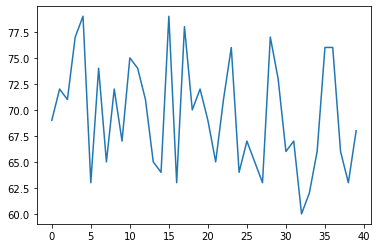

In [ ]:
plt.plot(temps)
plt.savefig('temps.png')
#in Julia you use plot(temps) and savefig("temperature.pdf")

In [ ]:
v = np.array([1, 2, 3])
vT = [[1],
      [2],
      [3]]
vT*v, np.dot(v,v.T)

(array([[1, 2, 3],
        [2, 4, 6],
        [3, 6, 9]]), 14)

# 1.2, 1.3 Vector Addition, Scalar-Vector Multiplication & Addition

In [ ]:
np.array([0,7,3])+np.array([1,2,0]), [0,7,3] + [1,2,0]
#In Julia you can use the right result to get the left result

(array([1, 9, 3]), [0, 7, 3, 1, 2, 0])

In [ ]:
np.array([1,9]) - np.array([1,1])

array([0, 8])

In [ ]:
x = np.array([0,2,-1]) 
2.2*x

array([ 0. ,  4.4, -2.2])

In [ ]:
x/3

array([ 0.        ,  0.66666667, -0.33333333])

In [ ]:
3 / x #In Julia this returns the same as x/3!!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ inf,  1.5, -3. ])

In [ ]:
np.array([1.1,-3.7,.3]) - 1.4 #In Julia this is .-; just using - returns an Error no method matching -

array([-0.3, -5.1, -1.1])

In [ ]:
.7 + np.array([1,-1])

array([ 1.7, -0.3])

#### Elementwise Operations, Elementwise Operations with a Scalar

In [ ]:
# Percentage increase in portfolio
p_init = np.array([22.15, 89.32, 56.77])
p_fin = np.array([23.05, 87.32, 57.13])
r = (p_fin - p_init) / p_init #in Julia you would use ./ to denote elementwise 
r

array([ 0.04063205, -0.0223914 ,  0.00634138])

In [ ]:
w = [1,2,2]; z = [1,2,3]
w == z, np.array(w) == np.array(z), np.array_equal(w,z) 
#in Julia you can differentiate the two methods of relational 
#checking with == and .== 

(False, array([ True,  True, False]), False)

In [ ]:
x = np.array([1.1, .5, -1.5, -.3])
[i for i in x if abs(i) > 1] #in Julia: x[abs.(x) .> 1], you ask x for a slice using an elementwise absolute check (abs.(x)) and element wise comparator (.>)


[1.1, -1.5]

In [ ]:
x = np.random.randn(4) #in Julia: x = rand(4)
x

array([-0.14051522,  1.97476408, -0.21400729, -1.3743196 ])

In [ ]:
x[0:2] = [-1,1]
x

array([-1.        ,  1.        , -0.21400729, -1.3743196 ])

In [ ]:
x[1:3] = 1.3
x

array([-1.       ,  1.3      ,  1.3      , -1.3743196])

#### Linear Combination

In [ ]:
a,b = np.array([1, 2]), np.array([3, 4])
alpha,beta = -.5, 1.5
a, b, alpha, beta

(array([1, 2]), array([3, 4]), -0.5, 1.5)

In [ ]:
c = alpha*a + beta*b
c #all same as Julia, just take out np array casting

array([4., 5.])

In [ ]:
coef = ([-.5, 1.5])
vecs = [np.array([1, 2]), np.array([3, 4])]

def lincomb(coeff, vectors):
    n = len(vectors[0])
    a = np.zeros(n)
    for i in range(len(vectors)):
        a += coeff[i] * vectors[i]
    return a

#or, you can use a List Comprehension:

def lincomb_LC(coeff,vectors):
    return [coef[i] * vecs[i] + coef[i+1] * vecs[i+1] 
            for i in range(len(coef)-1)]
    #or: sum([coef[i] * vecs[i] for i in range(len(vecs))])

lincomb(coef, vecs), lincomb_LC(coef,vecs)

(array([4., 5.]), [array([4., 5.])])

In [ ]:
a, b, beta = np.random.rand(3), np.random.rand(3), np.random.rand()
a, b, beta

(array([0.21173244, 0.19337185, 0.23078043]),
 array([0.83509295, 0.45229445, 0.98207947]),
 0.32090512942768723)

#### Checking properties

In [ ]:
lhs = beta*(a+b)
rhs = beta*a + beta*b
lhs, rhs #same as Julia for checking distributive property

(array([0.33593164, 0.20719763, 0.38921296]),
 array([0.33593164, 0.20719763, 0.38921296]))

# 1.4 Inner Product

In [4]:
x = np.array([-1,2,2])
y = np.array([1,0,-3])
np.inner(x,y) #Julia equiv: x'*y

-7

#### NPV

In [5]:
c = np.array([.1,.1,.1,1.1])
n = len(c)
r = .05
d = np.array([(1+r)**-(i) for i in range(0,n)]) #J equiv: (1+r) .^ -(0:n-1)
d, sum(c*d) #NPV

(array([1.        , 0.95238095, 0.90702948, 0.8638376 ]), 1.236162401468524)

#### Total School-Age Population

In [11]:
#Ambiguous solution to attempt at "Total school-age population", 
#unable to decipher description of data given
import collections
from collections import Counter

s = np.concatenate((np.zeros(5),np.ones(14),np.zeros(81)))
ages = [np.random.randint(5,19) for i in range(100)]
# data = dict(collections.OrderedDict(sorted(data.items())))
# counts = np.array([v for k,v in data.items()])
# dists = np.array([v/100 for k,v in data.items()])
sum(s*ages) 

143.0

# 1.5 Complexity of Vector Computations

In [19]:
a,b = np.random.randn(),np.random.randn()
lhs = (a+b)*(a-b)
rhs = a**2 - b**2
lhs,rhs

(3.5551564373752864, 3.555156437375287)

In [23]:
import timeit
a,b = np.random.randn(10**5), np.random.randn(10**5)
%timeit sum(a*b) #@time in J

100 loops, best of 5: 16 ms per loop


In [24]:
%timeit sum(a*b)

100 loops, best of 5: 15.8 ms per loop


In [37]:
sparsevec = np.zeros(10**6)
sparsevec[123456], sparsevec[123457] = [1.0, -1.0] 
#this is a one line operation in J using the SparseVec package: 
#sparsevec([list of indices to set], [values for those indices], vec size)
np.nonzero(sparsevec),len(np.nonzero(sparsevec))

((array([123456, 123457]),), 1)

In [38]:
b = np.random.randn(10**6)
%timeit c = sparsevec + b 

100 loops, best of 5: 2.3 ms per loop
